Previsões de vendas usando Facebook Prophet

In [57]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [58]:
# Carregando banco de dados
vendas = pd.read_csv('/content/train.csv')

<ipython-input-58-22a6026c3947>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vendas = pd.read_csv('/content/train.csv')


In [59]:
# Observando
vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [60]:
# Observando numero de linhas e colunas
vendas.shape

(1017209, 9)

In [61]:
# Informações
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [62]:
# Dados estatísticos
vendas.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [63]:
# Verificação de valores nulos
vendas.isna().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [64]:
# Observando valores únicos da varriável dayofweek
vendas['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [65]:
# Da variavel Open, se esta aberta ou fechada a loja onde 1 = aberta e 0 = fechada
vendas['Open'].unique()

array([1, 0])

In [66]:
# Da variavel promo para saber se exitia ou não promoção
vendas['Promo'].unique()

array([1, 0])

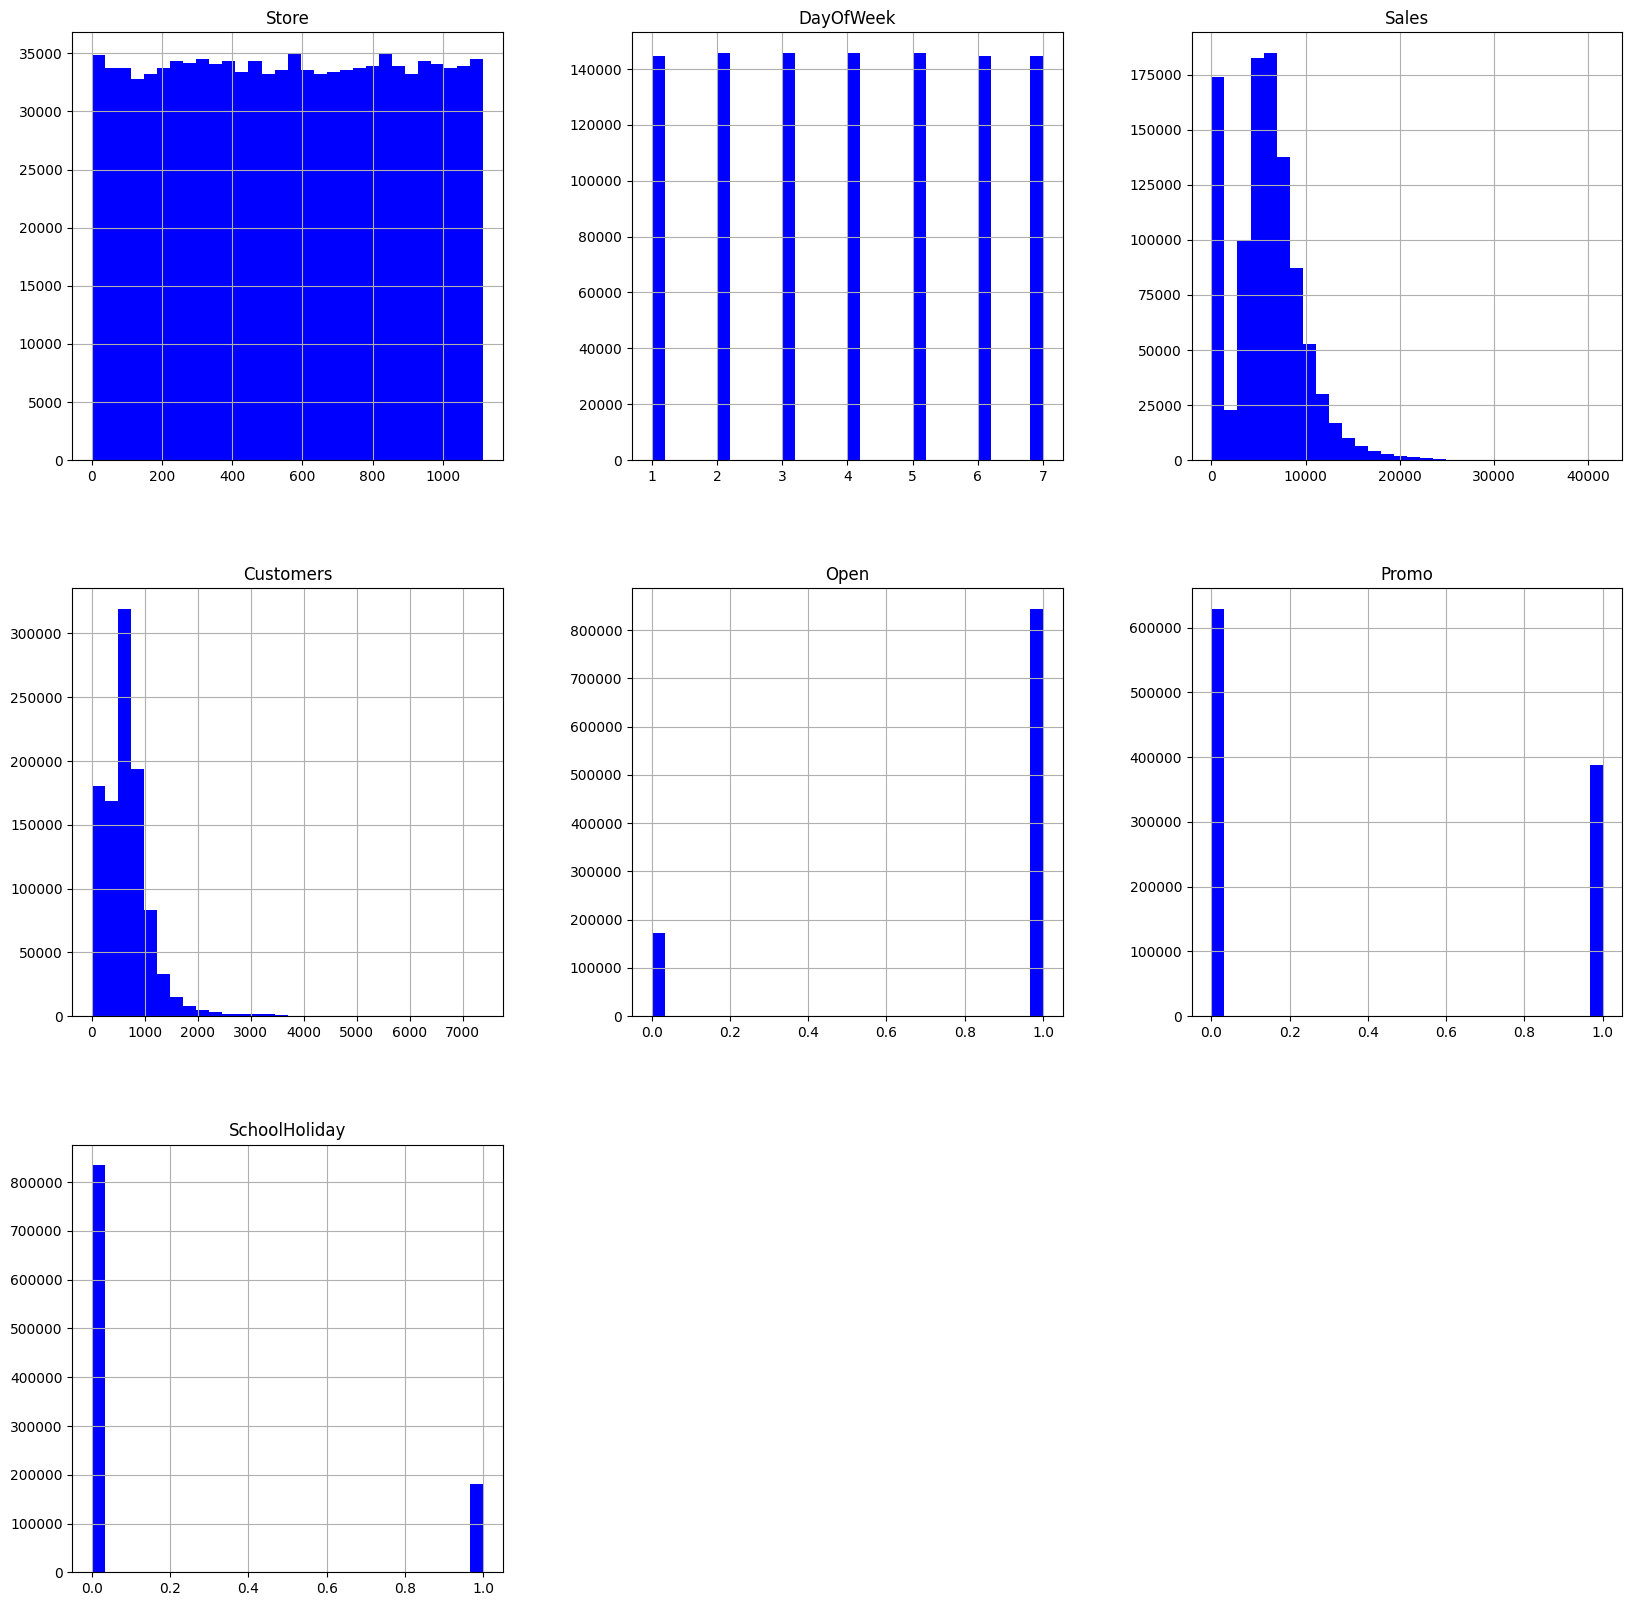

In [67]:
# verificando a distribuição dos dados através de histograma
vendas.hist(bins = 30, figsize = (20, 20), color = 'b');

In [68]:
# Observando valor máximo de clientes por um dia
vendas['Customers'].max()

7388

In [69]:
# criando dataframe para o dias em qua as lojas estavam abertas
vendas1 = vendas[vendas['Open'] == 1]

In [70]:
# Observando
vendas1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [71]:
# Observando o numero de registros
vendas1.shape

(844392, 9)

In [72]:
# Apagando a coluna Open porque já sabemos que as lojas estavam abertas
vendas1.drop(['Open'], axis = 1, inplace= True)

<ipython-input-72-2df472440bca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas1.drop(['Open'], axis = 1, inplace= True)


In [73]:
# Conferindo se a coluna foi apagada
vendas1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [74]:
# Observando as estatisticas descritivas do novo dataframe
vendas1.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [75]:
# Carregando a base de dados das lojas
loja = pd.read_csv('/content/store.csv')

In [76]:
# Observando
loja.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [77]:
# Observando numero de linhas e colunas
loja.shape

(1115, 10)

In [78]:
# Observando valores nulos
loja.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [79]:
# Verificando quantidade de valores nulos
loja.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [80]:
# Para as variaveis de promoções por semana e ano, não faz sentido imputarmos a média, vamos preencher com 0
# pois etão automaticamente fora das promoções, pois quando a variavel Promo2 é 0 as outras lojas não participam
loja1 = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in loja1:
  loja[str].fillna(0, inplace = True)

In [81]:
# Confirmando se os valores foram imputados
loja.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [82]:
# Para a variavel Competition Distance usaremos a média para preencher os valores faltantes
loja['CompetitionDistance'].fillna(loja['CompetitionDistance'].mean(), inplace = True)

In [83]:
# Conferindo
loja.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

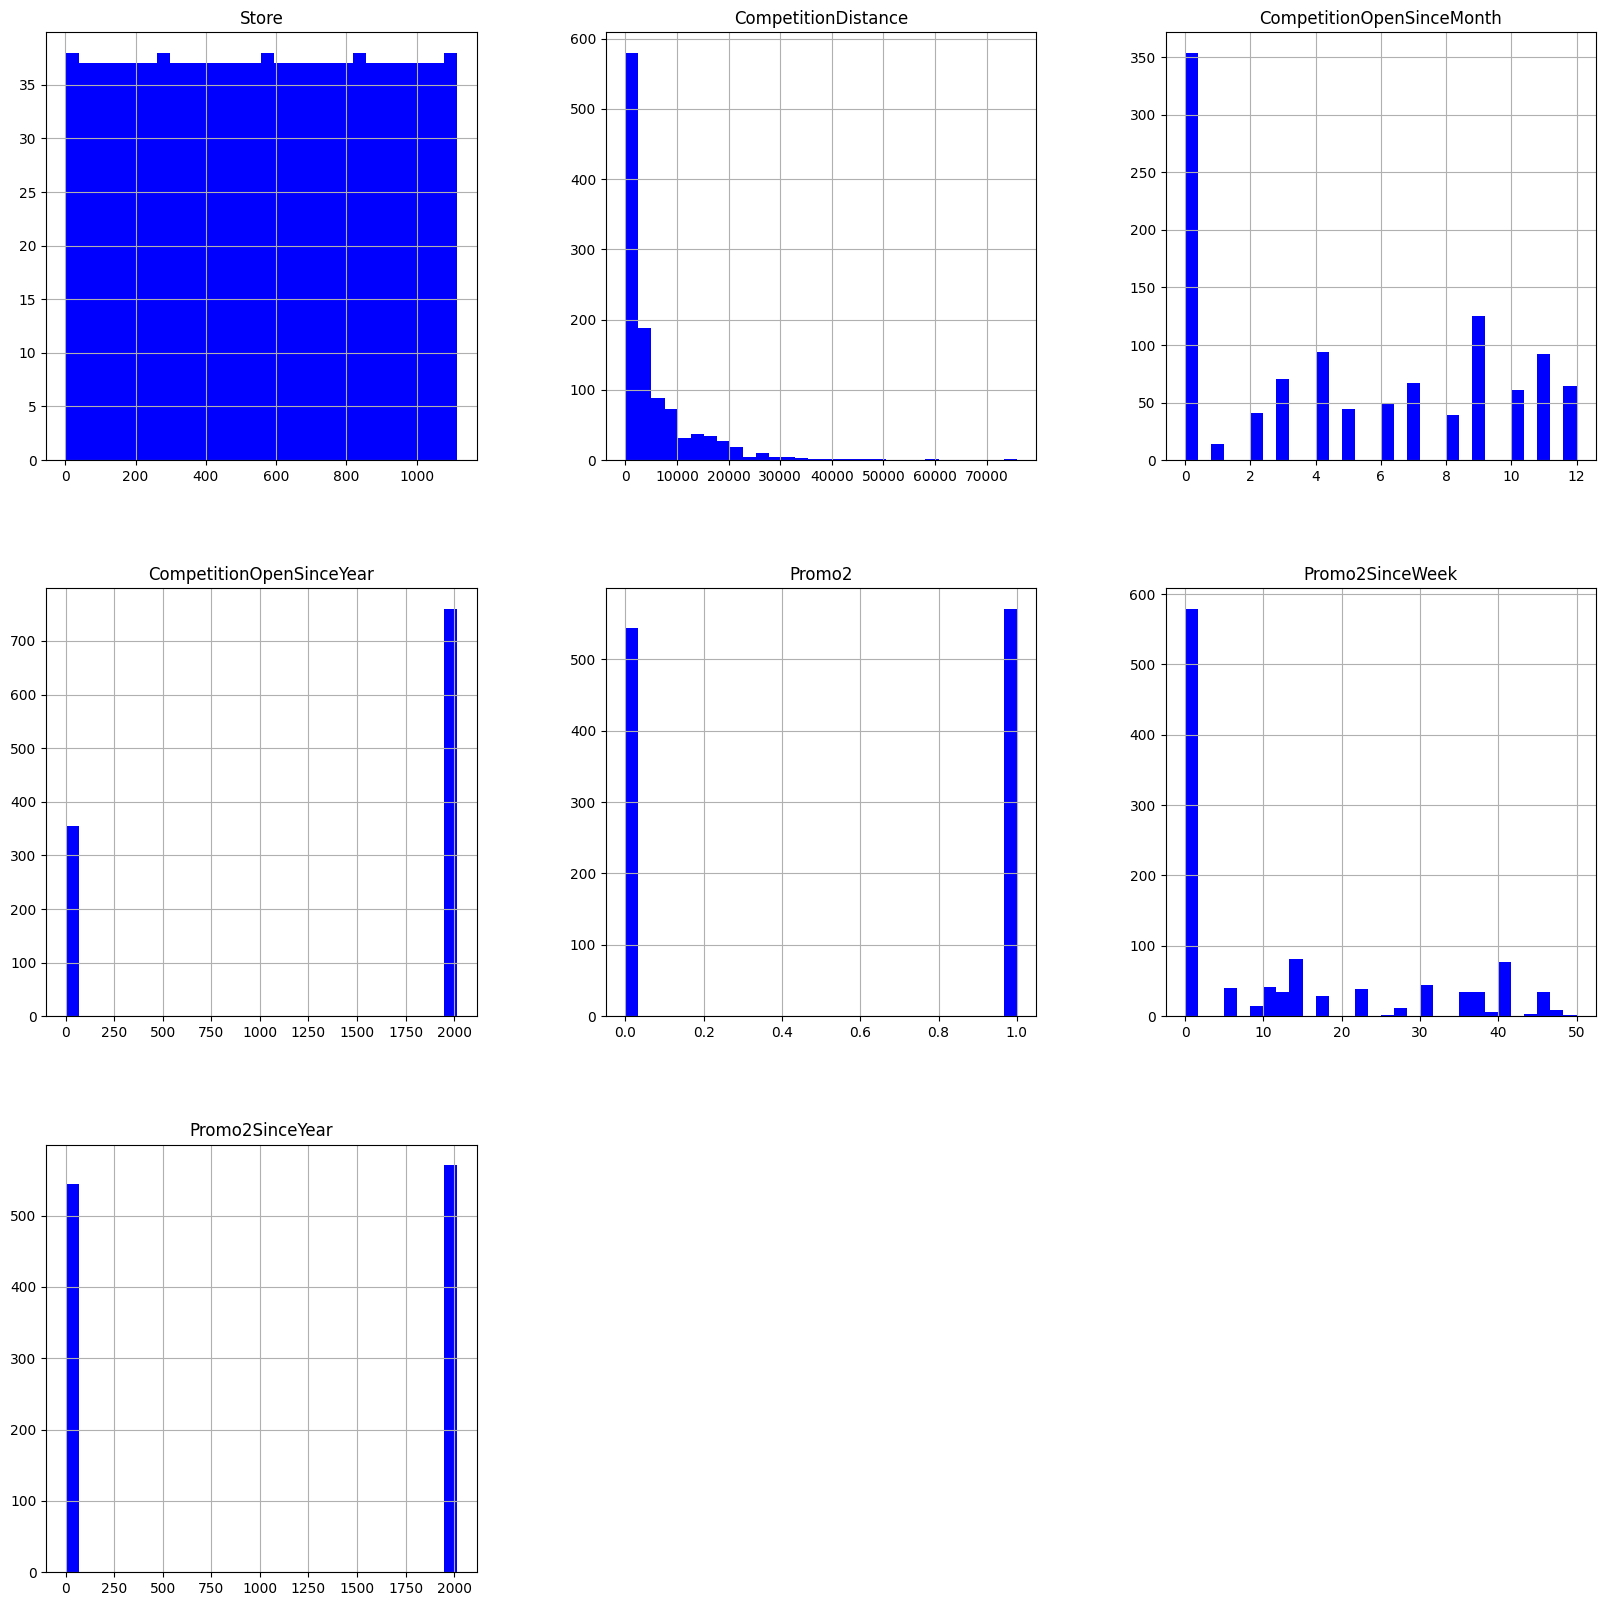

In [84]:
# Observando histograma da distribuição de dados com os valores corrigidos
loja.hist(bins = 30, figsize = (20, 20), color = 'b');

In [85]:
# Unindo os dois bancos de dados
loja_vend = pd.merge(vendas1, loja, how = 'inner', on = 'Store')

In [86]:
# Observando a união
loja_vend.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [87]:
# Observando a quantidade de registros
loja_vend.shape

(844392, 17)

<ipython-input-88-402fba08e392>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = loja_vend.corr()


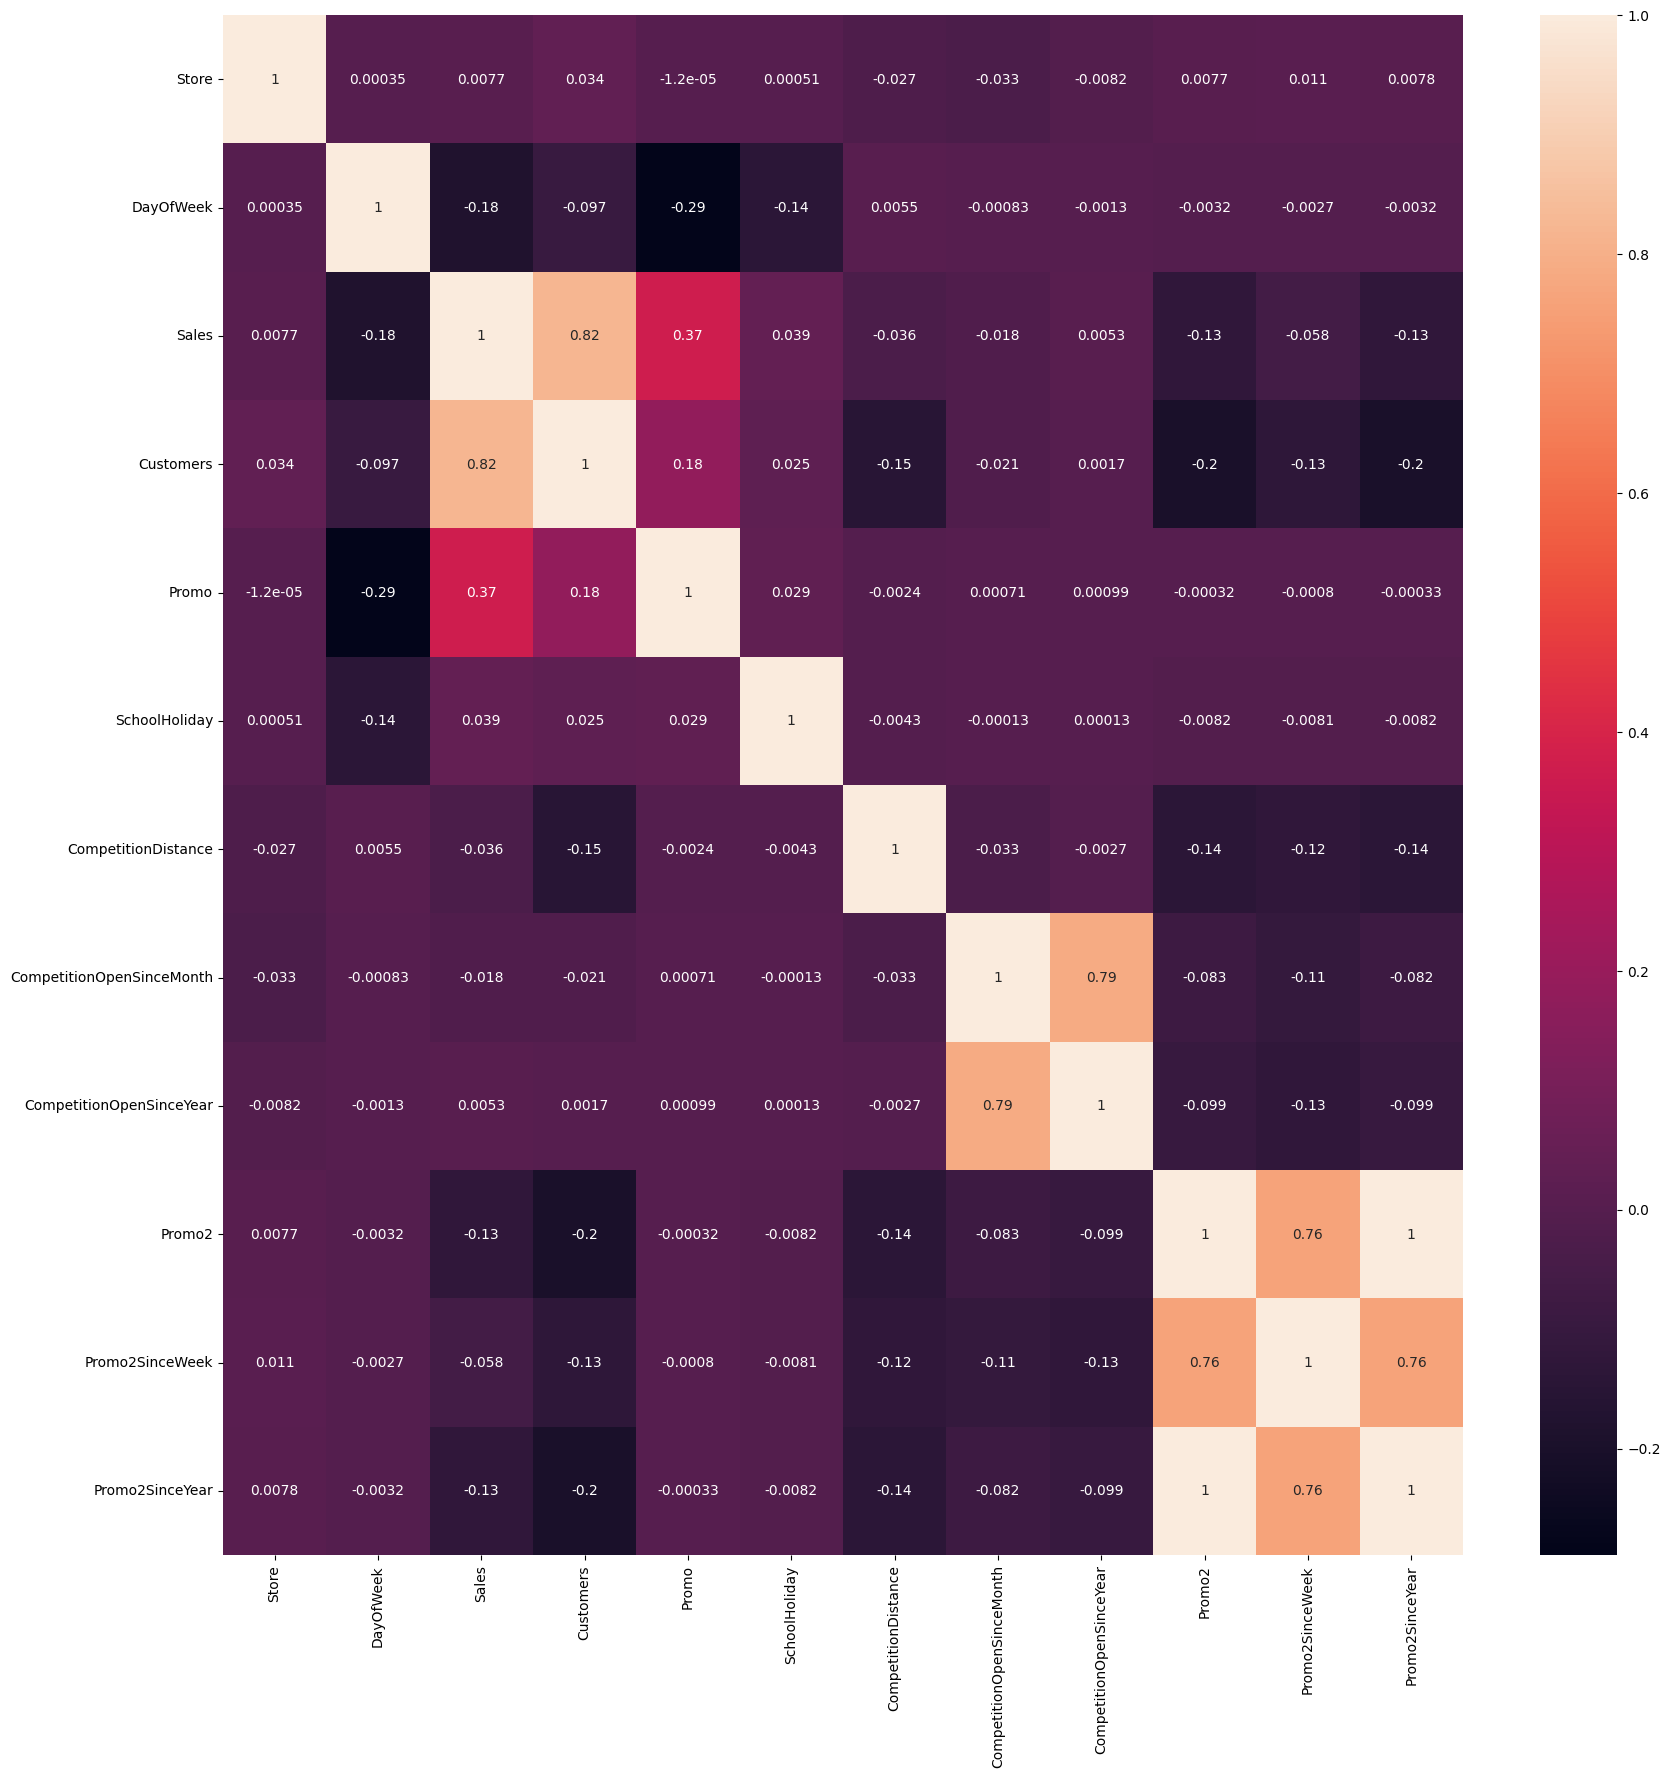

In [88]:
# Criando matriz de correlação
matriz_corr = loja_vend.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(matriz_corr, annot = True);

In [89]:
# Indicando a correlação de todas as variavés com a variavel Sales
matriz_corr = loja_vend.corr()['Sales'].sort_values()
matriz_corr


<ipython-input-89-5514dbb424ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = loja_vend.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [90]:
# Separando as datas em dia, mes e ano
# Iniciando por ano
loja_vend['Year'] = pd.DatetimeIndex(loja_vend['Date']).year

In [91]:
# Separando o mês
loja_vend['Month'] = pd.DatetimeIndex(loja_vend['Date']).month

In [92]:
# Separando o dia
loja_vend['Day'] = pd.DatetimeIndex(loja_vend['Date']).day

In [93]:
# Conferindo
loja_vend.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


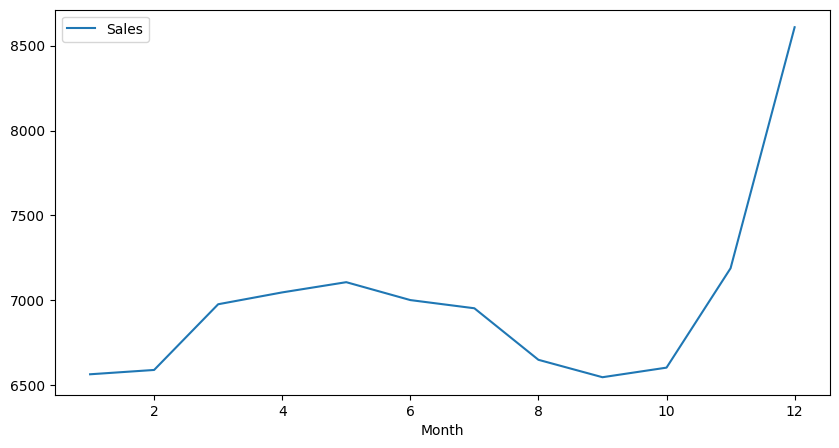

In [94]:
# Grafico da media de vendas por mês
axis = loja_vend.groupby('Month')[['Sales']].mean().plot(figsize = (10,5))

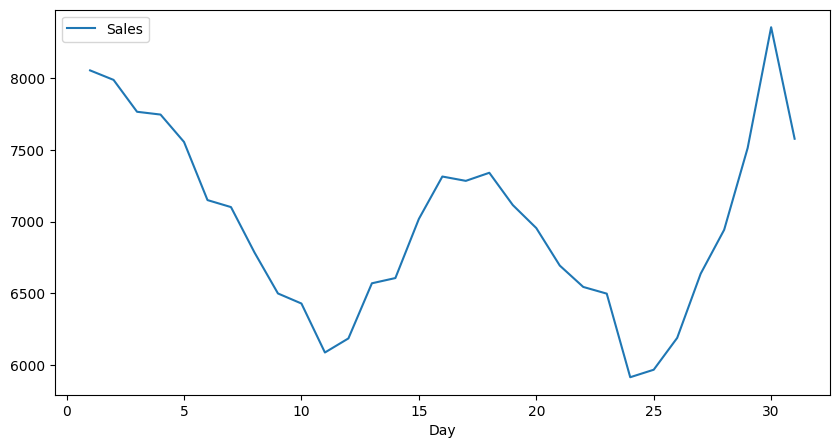

In [95]:
# Grafico da media de vendas por dia
axis = loja_vend.groupby('Day')[['Sales']].mean().plot(figsize = (10,5))

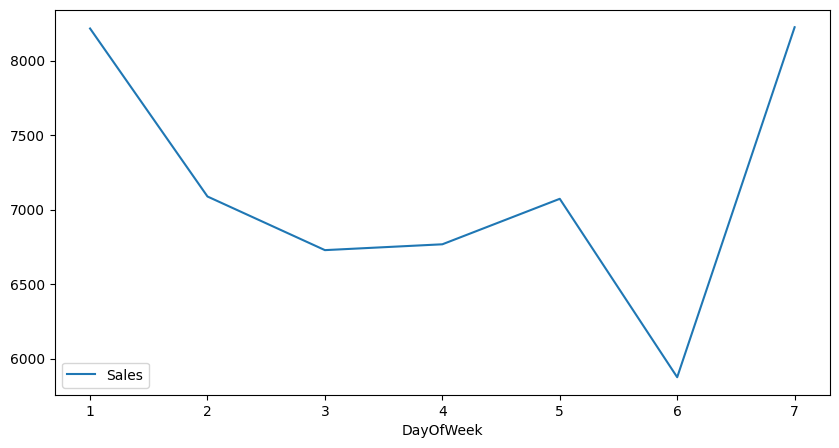

In [96]:
# Grafico da media de vendas por dia da semana
axis = loja_vend.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5))

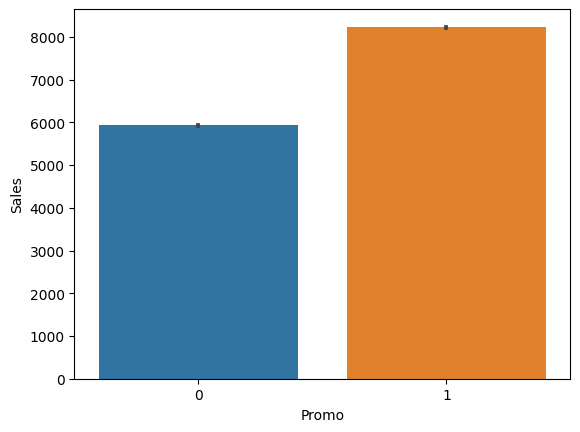

In [98]:
# Gráfico para saber o quanto as promoções interferem nas vendas
# 1 = promoção e 0 = sem promoção
sns.barplot(x = 'Promo', y = 'Sales', data = loja_vend);